# Data Mining (2CSDE71)
## Name :- Harsh Pansuriya
## Roll No. :- 21BCE176
## Date :- 16th February, 2024
## Prac. No :- 5

### Aim :-

A. Implement a binning method for numeric data. Specifically, you need to implement two binning methods: equi-width and equi-depth. Additionally, you should apply a smoothing technique to adjust the boundaries of the bins.

B. Implement the menu driven program for normalization for given dataset from user (by all means) for the following normalization techniques. for example, dataset (age): 13, 15, 16, 16, 19, 20, 20, 21, 22, 22, 25, 25, 25, 25, 30, 33, 33, 35, 35, 35, 35, 36, 40, 45, 46, 52, 70.
>a) Use Min-Max Normalization to transform the value 25 and 52 for
age onto the range [0.0,1.0].
>
>b) Use z-score normalization to transform the value 35 for age, where
the standard deviation of age is 12.94 years.
>
>c) Use normalization by decimal scaling to transform the value 35
for age.

In [1]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import math

In [2]:
# Assuming the data is in a CSV file (adjust if needed)
dataset = pd.read_csv("/Users/harsh/Documents/DM/Database/hr_ds.csv")

# Selecting the desired columns
selected_data = dataset[["Salary", "EngagementSurvey", "Absences"]]

# Rename the 'EngagementSurvey' column to 'EngagementScore'
selected_data = selected_data.rename(columns={'EngagementSurvey': 'EngagementScore'})

#### A. Binning method for numeric data.

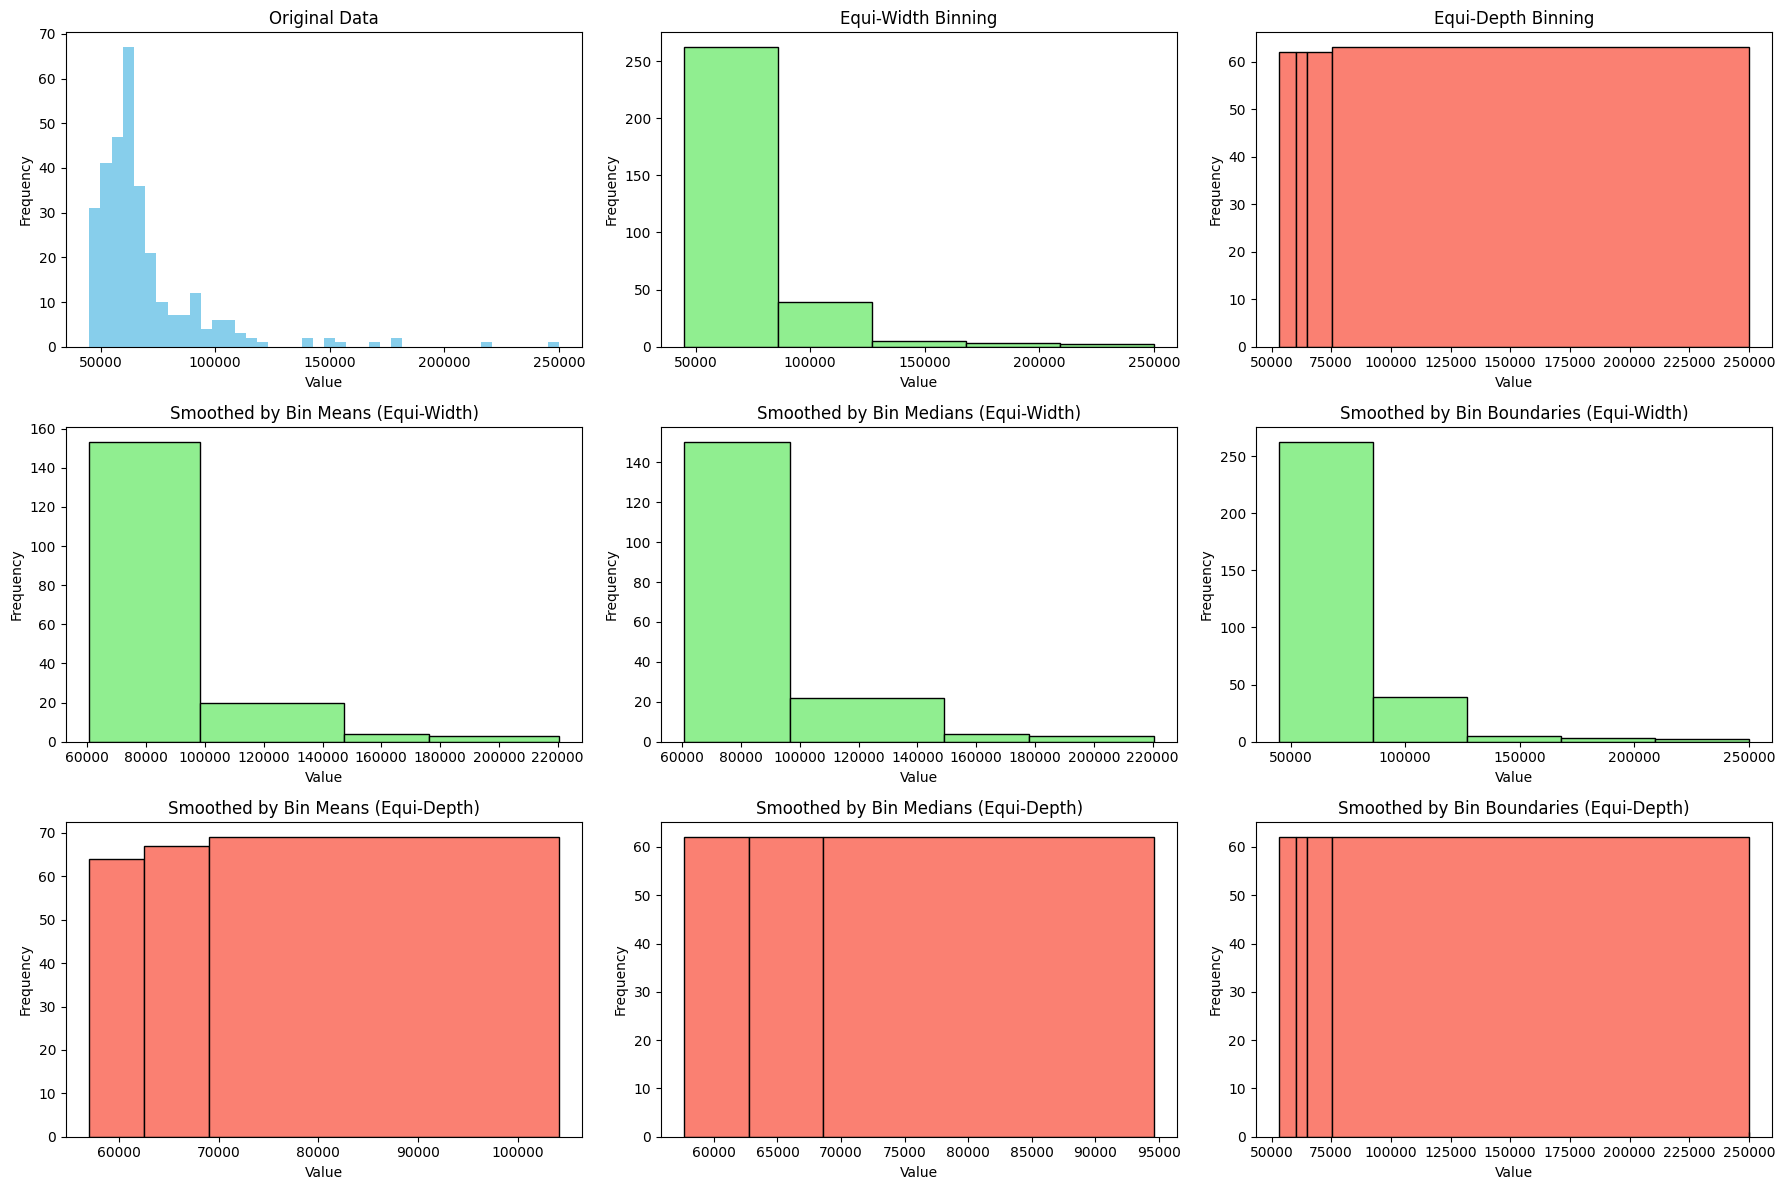

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def equi_width_binning(data, num_bins):
    min_val = np.min(data)
    max_val = np.max(data)
    bin_width = (max_val - min_val) / num_bins
    bins = [min_val + i * bin_width for i in range(num_bins)]
    bins.append(max_val)
    return bins

def equi_depth_binning(data, num_bins):
    sorted_data = sorted(data)
    bin_size = len(data) // num_bins
    bins = []
    for i in range(num_bins - 1):
        bins.append(sorted_data[(i + 1) * bin_size])
    bins.append(max(sorted_data))
    return bins

def smooth_bins_by_mean(bins, data):
    smoothed_bins = []
    for i in range(len(bins) - 1):
        bin_mean = np.mean(data[(data >= bins[i]) & (data < bins[i+1])])
        smoothed_bins.append(bin_mean)
    return smoothed_bins

def smooth_bins_by_median(bins, data):
    smoothed_bins = []
    for i in range(len(bins) - 1):
        bin_median = np.median(data[(data >= bins[i]) & (data < bins[i+1])])
        smoothed_bins.append(bin_median)
    return smoothed_bins

def smooth_bins_by_boundaries(bins, data):
    smoothed_bins = []
    for val in data:
        closest_boundary = min(bins, key=lambda x: abs(x - val))
        smoothed_bins.append(closest_boundary)
    return smoothed_bins

data = selected_data["Salary"]
num_bins = 5

# Equi-width binning
width_bins = equi_width_binning(data, num_bins)

# Equi-depth binning
depth_bins = equi_depth_binning(data, num_bins)

# Smoothed bins
smoothed_width_bins_mean = smooth_bins_by_mean(width_bins, data)
smoothed_width_bins_median = smooth_bins_by_median(width_bins, data)
smoothed_width_bins_boundaries = smooth_bins_by_boundaries(width_bins, data)

smoothed_depth_bins_mean = smooth_bins_by_mean(depth_bins, data)
smoothed_depth_bins_median = smooth_bins_by_median(depth_bins, data)
smoothed_depth_bins_boundaries = smooth_bins_by_boundaries(depth_bins, data)

# Plot original data and histograms
plt.figure(figsize=(18, 12))

# Original data
plt.subplot(3, 3, 1)
plt.hist(data, bins='auto', color='skyblue')
plt.title('Original Data')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Equi-width binning
plt.subplot(3, 3, 2)
plt.hist(data, bins=width_bins, color='lightgreen', edgecolor='black')
plt.title('Equi-Width Binning')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Equi-depth binning
plt.subplot(3, 3, 3)
plt.hist(data, bins=depth_bins, color='salmon', edgecolor='black')
plt.title('Equi-Depth Binning')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Smoothed by bin means - Equi-width
plt.subplot(3, 3, 4)
plt.hist(data, bins=smoothed_width_bins_mean, color='lightgreen', edgecolor='black')
plt.title('Smoothed by Bin Means (Equi-Width)')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Smoothed by bin means - Equi-depth
plt.subplot(3, 3, 7)
plt.hist(data, bins=smoothed_depth_bins_mean, color='salmon', edgecolor='black')
plt.title('Smoothed by Bin Means (Equi-Depth)')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Smoothed by bin medians - Equi-width
plt.subplot(3, 3, 5)
plt.hist(data, bins=smoothed_width_bins_median, color='lightgreen', edgecolor='black')
plt.title('Smoothed by Bin Medians (Equi-Width)')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Smoothed by bin medians - Equi-depth
plt.subplot(3, 3, 8)
plt.hist(data, bins=smoothed_depth_bins_median, color='salmon', edgecolor='black')
plt.title('Smoothed by Bin Medians (Equi-Depth)')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Smoothed by bin boundaries - Equi-width
plt.subplot(3, 3, 6)
smoothed_width_bins_boundaries.sort()  # Sort the list
plt.hist(data, bins=smoothed_width_bins_boundaries, color='lightgreen', edgecolor='black')
plt.title('Smoothed by Bin Boundaries (Equi-Width)')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Smoothed by bin boundaries - Equi-depth
plt.subplot(3, 3, 9)
smoothed_depth_bins_boundaries.sort()  # Sort the list
plt.hist(data, bins=smoothed_depth_bins_boundaries, color='salmon', edgecolor='black')
plt.title('Smoothed by Bin Boundaries (Equi-Depth)')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


#### B. Normalization

Select a normalization technique:
1. Min-Max Normalization
2. Z-score Normalization
3. Decimal Scaling Normalization


Enter your choice:  1
Enter the new minimum value:  0
Enter the new maximum value:  1


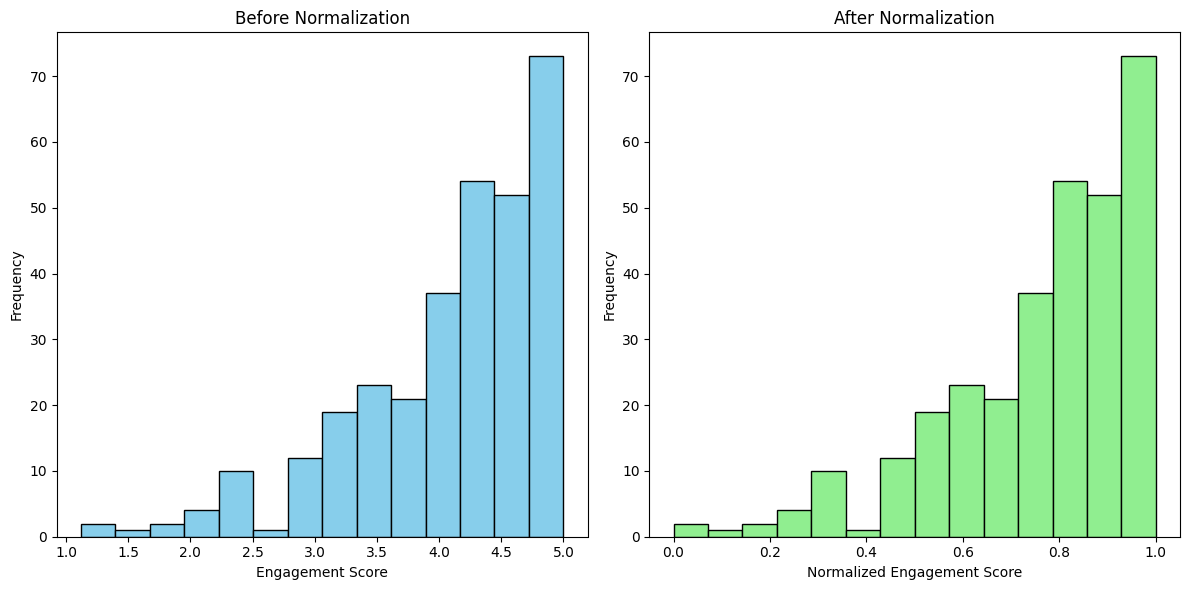

In [4]:
# Min-Max Normalization
def min_max_normalization(data, new_min_val, new_max_val):
    min_val = np.min(data)
    max_val = np.max(data)
    return (data - min_val) / (max_val - min_val) * (new_max_val - new_min_val) + new_min_val

# Z-score Normalization
def z_score_normalization(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    return (data - mean) / std_dev

# Decimal Scaling Normalization
def decimal_scaling_normalization(data):
    max_abs_value = np.max(np.abs(data))
    scale_factor = math.ceil(math.log10(max_abs_value))
    return data / (10 ** scale_factor)

# Function to select the normalization technique
def select_normalization_technique(data):
    print("Select a normalization technique:")
    print("1. Min-Max Normalization")
    print("2. Z-score Normalization")
    print("3. Decimal Scaling Normalization")
    choice = int(input("Enter your choice: "))
    
    if choice == 1:
        min_val = float(input("Enter the new minimum value: "))
        max_val = float(input("Enter the new maximum value: "))
        normalized_data = min_max_normalization(data, min_val, max_val)
        return normalized_data
    elif choice == 2:
        normalized_data = z_score_normalization(data)
        return normalized_data
    elif choice == 3:
        normalized_data = decimal_scaling_normalization(data)
        return normalized_data
    else:
        print("Invalid choice.")
        return None

# Example dataset
# engagement_scores = [13, 15, 16, 16, 19, 20, 20, 21, 22, 22, 25, 25, 25, 25, 30, 33, 33, 35, 35, 35, 35, 36, 40, 45, 46, 52, 70]

data = selected_data["EngagementScore"]

# Select normalization technique
normalized_data = select_normalization_technique(data)

if normalized_data is not None:
    # Plot histograms before and after normalization
    plt.figure(figsize=(12, 6))
    
    # Before normalization
    plt.subplot(1, 2, 1)
    plt.hist(data, bins='auto', color='skyblue', edgecolor='black')
    plt.title('Before Normalization')
    plt.xlabel('Engagement Score')
    plt.ylabel('Frequency')
    
    # After normalization
    plt.subplot(1, 2, 2)
    plt.hist(normalized_data, bins='auto', color='lightgreen', edgecolor='black')
    plt.title('After Normalization')
    plt.xlabel('Normalized Engagement Score')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()
